/tmp/ipykernel_72754/1896134460.py:63: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


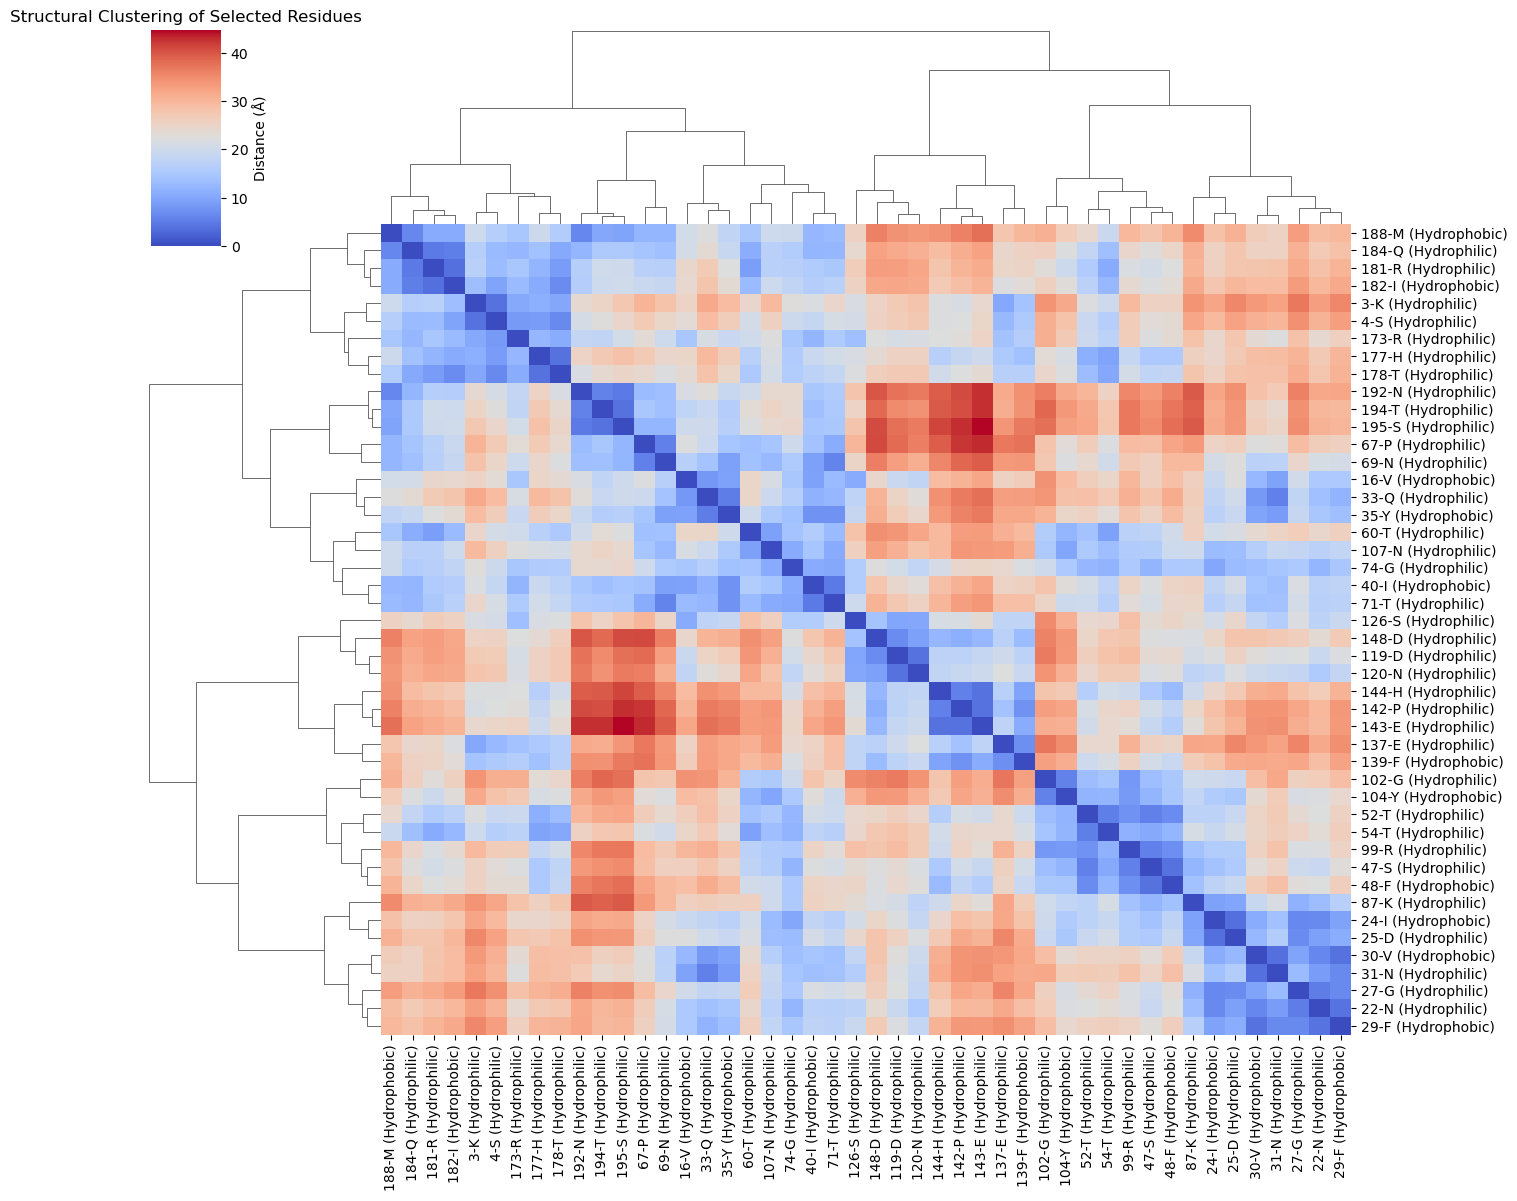

In [6]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")

# Compute pairwise distances
distance_matrix = squareform(pdist(residue_coords))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustered heatmap
sns.clustermap(
    pd.DataFrame(distance_matrix, index=labels, columns=labels),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å)'},
    figsize=(14, 12)
)
plt.title("Structural Clustering of Selected Residues")
plt.show()


Mouse Sequence (Cleaned): KSVNIDGFVNQYISFTTTPNTGKRGYNDNSEFPEHDRHTRIQMNTS
Human Sequence (Cleaned): NRILLNEYIQKFVAYAQANGIATCSFSEKTDLSSQEHQASTKLKFN


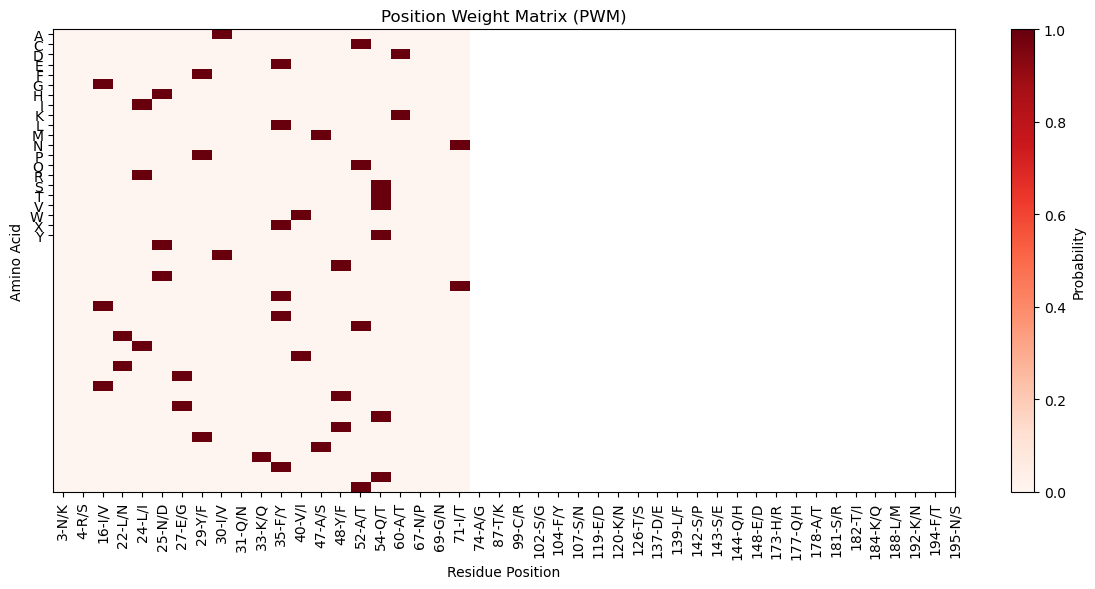

/tmp/ipykernel_7449/2310351145.py:102: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


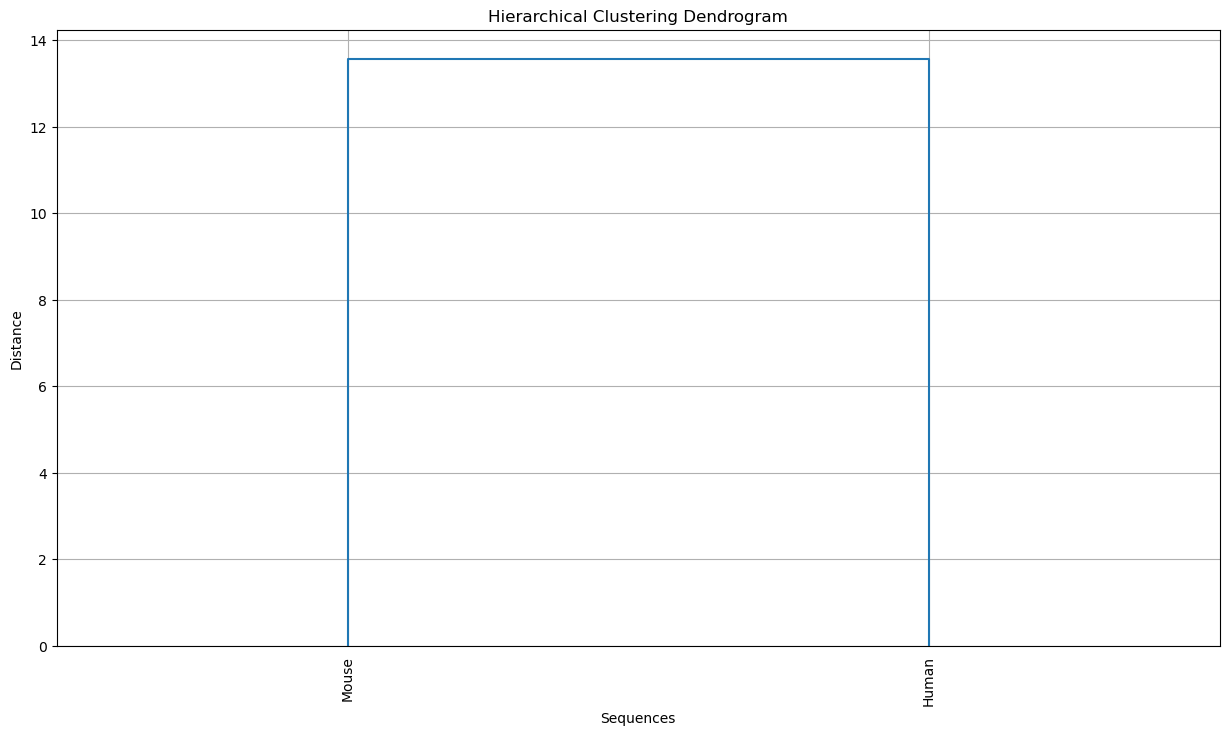

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

# Define the amino acid alphabet
amino_acids = "ACDEFGHIKLMNPQRSTVWXY"

# Function to clean sequences by removing non-amino acid characters
def clean_sequence(sequence):
    return ''.join([residue for residue in sequence if residue in amino_acids])

# Residue mapping table
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Clean the sequences
def build_clean_sequence(residue_mapping):
    mouse_seq = ""
    human_seq = ""
    for _, human_res, mouse_res in residue_mapping:
        # Clean both human and mouse residues
        human_seq += clean_sequence(human_res)
        mouse_seq += clean_sequence(mouse_res)
    return mouse_seq, human_seq

# Build cleaned sequences
mouse_seq, human_seq = build_clean_sequence(selected_residues)

# Output cleaned sequences
print("Mouse Sequence (Cleaned):", mouse_seq)
print("Human Sequence (Cleaned):", human_seq)

# Create MultipleSeqAlignment object
sequences = [
    SeqRecord(Seq(mouse_seq), id="Mouse"),
    SeqRecord(Seq(human_seq), id="Human")
]

alignment = MultipleSeqAlignment(sequences)

# Calculate the Position Weight Matrix (PWM)
def calculate_pwm(alignment):
    pwm = np.zeros((len(alignment), len(amino_acids), len(selected_residues)))
    for i, record in enumerate(alignment):
        for j, residue in enumerate(str(record.seq)):
            if residue in amino_acids:
                pwm[i, amino_acids.index(residue), j] += 1
    pwm /= pwm.sum(axis=1, keepdims=True)  # Normalize the PWM
    return pwm

# Build the PWM
pwm = calculate_pwm(alignment)

# Create a PWM visualization
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(pwm[0].T, cmap='Reds', aspect='auto')
ax.set_xticks(range(len(selected_residues)))
ax.set_xticklabels([f"{res[0]}-{res[1]}/{res[2]}" for res in selected_residues], rotation=90)
ax.set_xlabel('Residue Position')
ax.set_ylabel('Amino Acid')
ax.set_title('Position Weight Matrix (PWM)')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Probability')

# Customize the tick labels and tick positions
ax.set_yticks(np.arange(len(amino_acids)))
ax.set_yticklabels(amino_acids)

# Adjust the spacing
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()

# Compute pairwise distance matrix (adjusted for clustering)
def compute_distance_matrix(pwm):
    # Use a simplified Euclidean distance between PWM vectors for this example
    pwm_reshaped = pwm.reshape(pwm.shape[0], -1)  # Flatten the PWM for each sequence
    distance_matrix = np.linalg.norm(pwm_reshaped[:, None] - pwm_reshaped, axis=2)  # Pairwise distances
    return distance_matrix

# Generate distance matrix from PWM
distance_matrix = compute_distance_matrix(pwm)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=["Mouse", "Human"], leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sequences')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residues with assigned clusters:
3-K (Hydrophilic) -> Cluster 1
4-S (Hydrophilic) -> Cluster 1
16-V (Hydrophobic) -> Cluster 2
22-N (Hydrophilic) -> Cluster 0
24-I (Hydrophobic) -> Cluster 0
25-D (Hydrophilic) -> Cluster 0
27-G (Hydrophilic) -> Cluster 0
29-F (Hydrophobic) -> Cluster 0
30-V (Hydrophobic) -> Cluster 0
31-N (Hydrophilic) -> Cluster 0
33-Q (Hydrophilic) -> Cluster 2
35-Y (Hydrophobic) -> Cluster 2
40-I (Hydrophobic) -> Cluster 2
47-S (Hydrophilic) -> Cluster 0
48-F (Hydrophobic) -> Cluster 0
52-T (Hydrophilic) -> Cluster 0
54-T (Hydrophilic) -> Cluster 0
60-T (Hydrophilic) -> Cluster 2
67-P (Hydrophilic) -> Cluster 2
69-N (Hydrophilic) -> Cluster 2
71-T (Hydrophilic) -> Cluster 2
74-G (Hydrophilic) -> Cluster 0
87-K (Hydrophilic) -> Cluster 0
99-R (Hydrophilic) -> Cluster 0
102-G (Hydrophilic) -> Cluster 0
104-Y (Hydrophobic) -> Cluster 0
107-N (Hydrophilic) -> Cluster 0
119-D (Hydrophilic) -> Cluster 1
120-N (Hydrophilic) -> Cluster 1
126-S (Hydrophilic) -> Cluster 1
137

/tmp/ipykernel_7449/2085517528.py:84: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


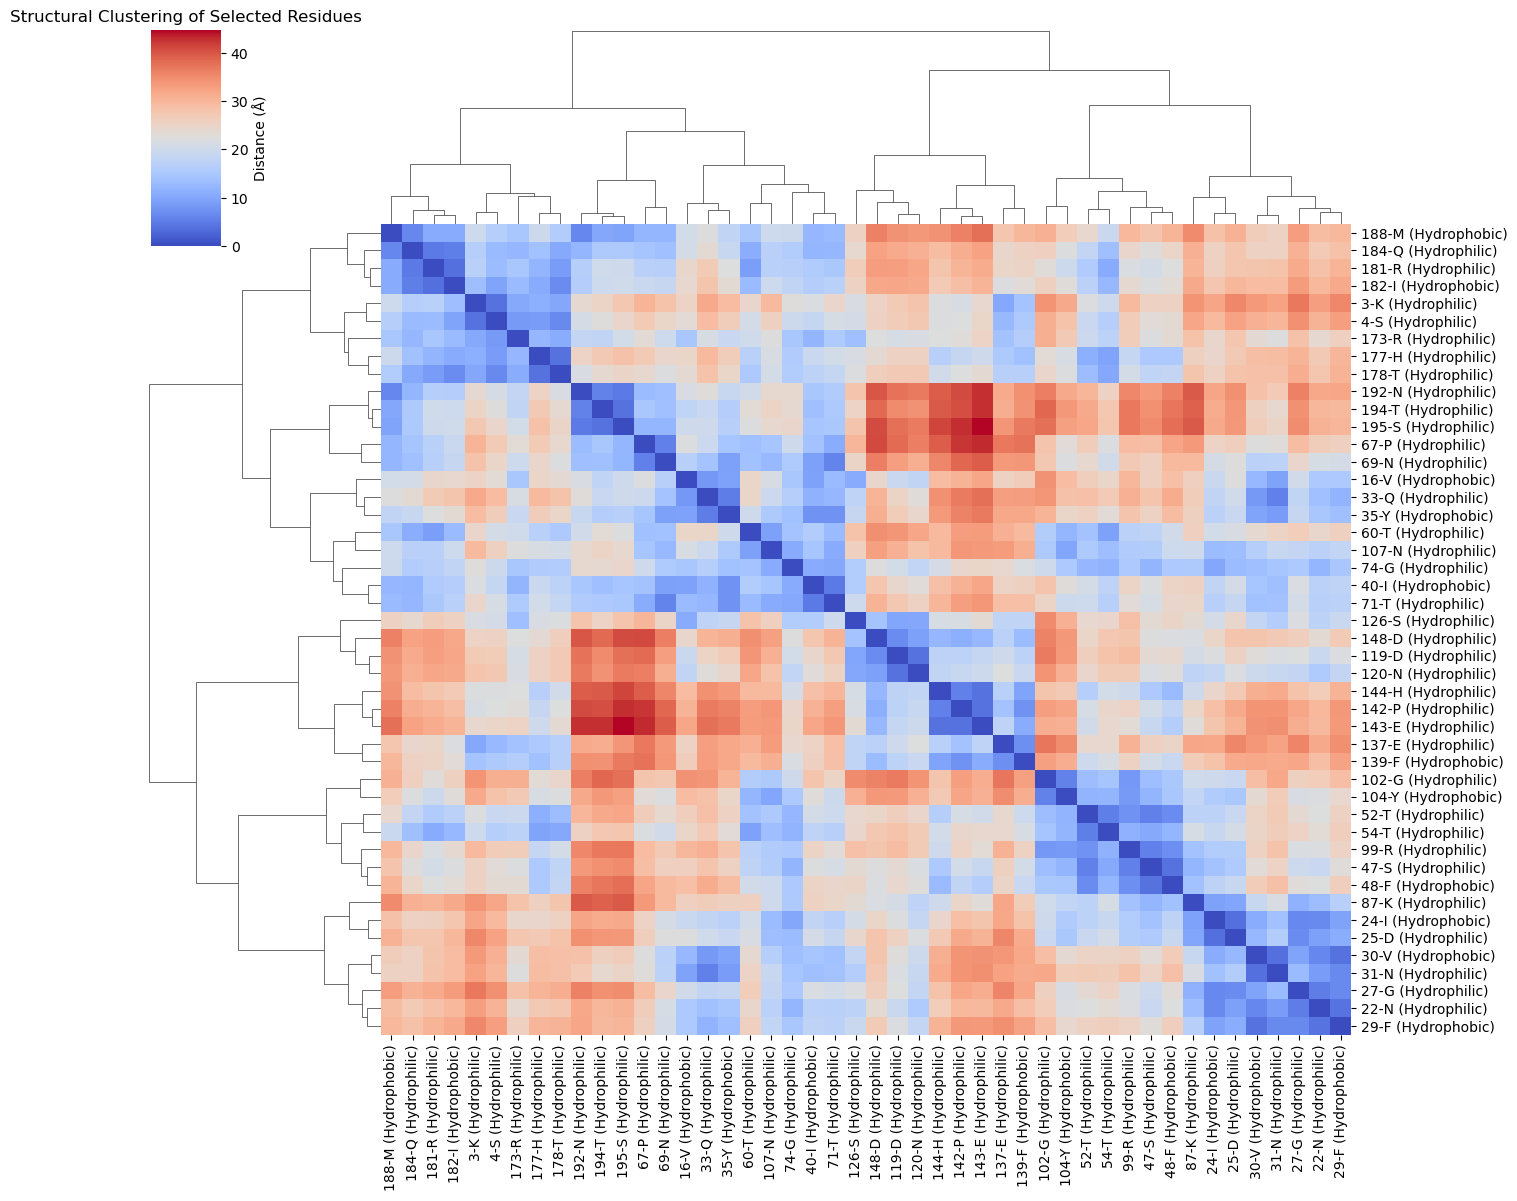

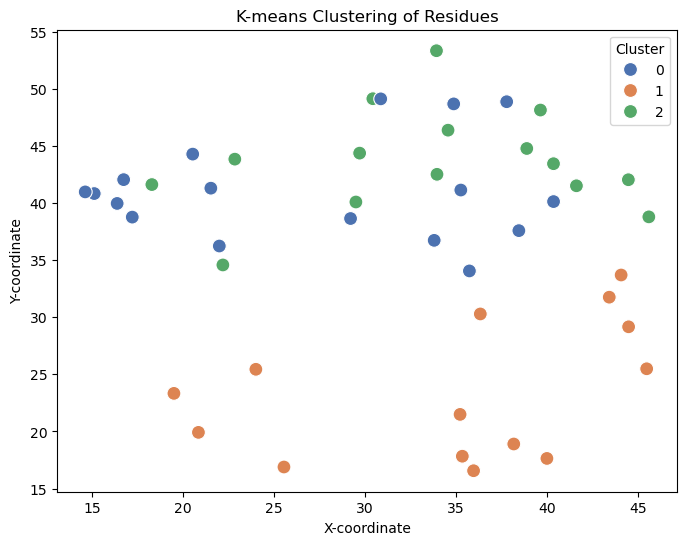

In [28]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
hydrophobicity_labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")
        hydrophobicity_labels.append(1 if hydrophobicity == "Hydrophobic" else 0)

# Convert the list of coordinates to a NumPy array
residue_coords = np.array(residue_coords)

# Perform K-means clustering (assuming 3 clusters, you can modify this)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(residue_coords)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Store the clusters in the labels
labeled_residues = list(zip(labels, cluster_labels))

# Print the labeled residues with their cluster
print("Residues with assigned clusters:")
for label, cluster in labeled_residues:
    print(f"{label} -> Cluster {cluster}")

# Compute pairwise distances (for heatmap)
distance_matrix = squareform(pdist(residue_coords))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustered heatmap
sns.clustermap(
    pd.DataFrame(distance_matrix, index=labels, columns=labels),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å)'},
    figsize=(14, 12)
)
plt.title("Structural Clustering of Selected Residues")
plt.show()

# Plot K-means clusters (visualizing the clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residue_coords[:, 0], y=residue_coords[:, 1], hue=cluster_labels, palette="deep", s=100)
plt.title("K-means Clustering of Residues")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(title="Cluster", loc="best")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residues with assigned clusters:
3-K (Hydrophilic) -> Cluster 0
4-S (Hydrophilic) -> Cluster 0
16-V (Hydrophobic) -> Cluster 2
22-N (Hydrophilic) -> Cluster 2
24-I (Hydrophobic) -> Cluster 2
25-D (Hydrophilic) -> Cluster 2
27-G (Hydrophilic) -> Cluster 2
29-F (Hydrophobic) -> Cluster 2
30-V (Hydrophobic) -> Cluster 2
31-N (Hydrophilic) -> Cluster 2
33-Q (Hydrophilic) -> Cluster 2
35-Y (Hydrophobic) -> Cluster 2
40-I (Hydrophobic) -> Cluster 2
47-S (Hydrophilic) -> Cluster 0
48-F (Hydrophobic) -> Cluster 2
52-T (Hydrophilic) -> Cluster 0
54-T (Hydrophilic) -> Cluster 0
60-T (Hydrophilic) -> Cluster 0
67-P (Hydrophilic) -> Cluster 0
69-N (Hydrophilic) -> Cluster 0
71-T (Hydrophilic) -> Cluster 0
74-G (Hydrophilic) -> Cluster 0
87-K (Hydrophilic) -> Cluster 2
99-R (Hydrophilic) -> Cluster 0
102-G (Hydrophilic) -> Cluster 0
104-Y (Hydrophobic) -> Cluster 2
107-N (Hydrophilic) -> Cluster 0
119-D (Hydrophilic) -> Cluster 1
120-N (Hydrophilic) -> Cluster 1
126-S (Hydrophilic) -> Cluster 0
137

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


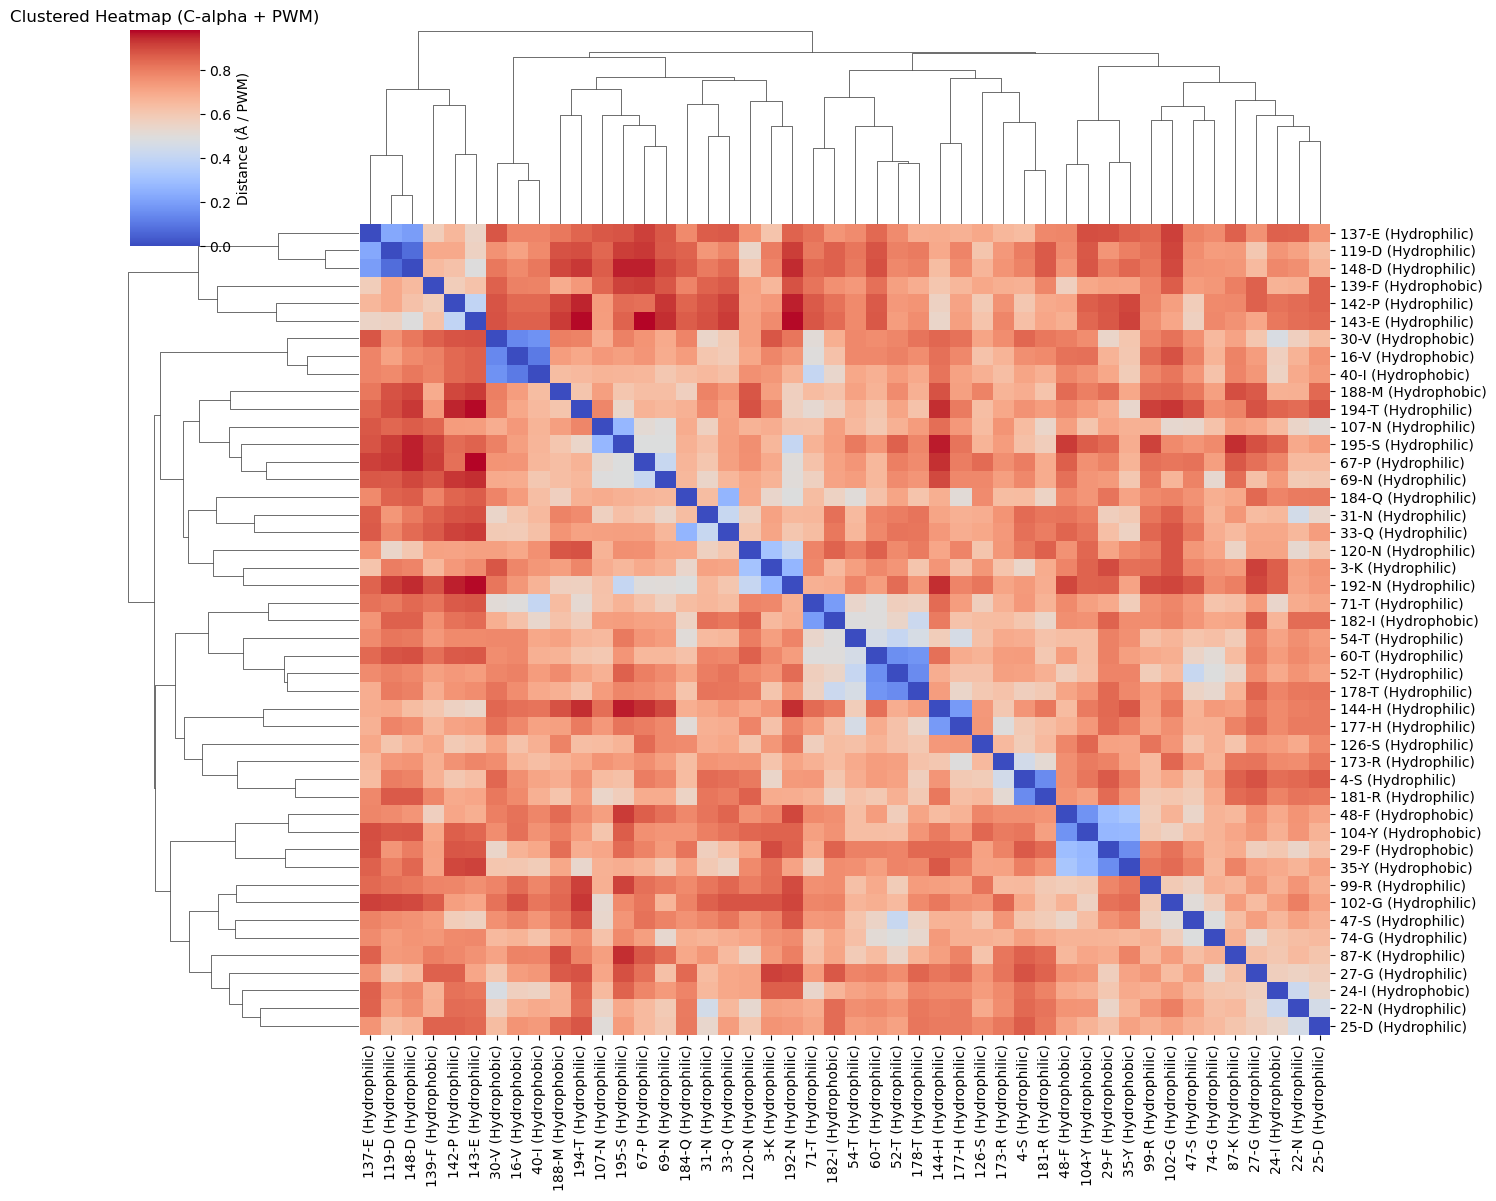

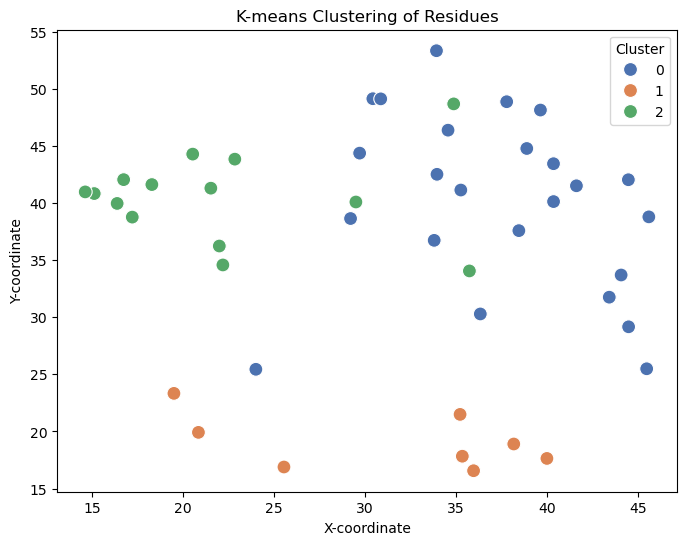

In [35]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Function to clean sequences by removing non-amino acid characters
def clean_sequence(sequence):
    amino_acids = "ACDEFGHIKLMNPQRSTVWXY"
    return ''.join([residue for residue in sequence if residue in amino_acids])

# Function to build cleaned sequences
def build_clean_sequence(residue_mapping):
    mouse_seq = ""
    human_seq = ""
    for _, human_res, mouse_res in residue_mapping:
        # Clean both human and mouse residues
        human_seq += clean_sequence(human_res)
        mouse_seq += clean_sequence(mouse_res)
    return mouse_seq, human_seq

# Cleaned sequences for mouse and human
mouse_seq, human_seq = build_clean_sequence(selected_residues)

# Create MultipleSeqAlignment object
sequences = [
    SeqRecord(Seq(mouse_seq), id="Mouse"),
    SeqRecord(Seq(human_seq), id="Human")
]

alignment = MultipleSeqAlignment(sequences)

# Calculate the Position Weight Matrix (PWM)
def calculate_pwm(alignment, amino_acids, selected_residues):
    pwm = np.zeros((len(amino_acids), len(selected_residues)))  # Shape: (Amino acids, Residue positions)
    for i, record in enumerate(alignment):
        for j, residue in enumerate(str(record.seq)):
            if residue in amino_acids:
                pwm[amino_acids.index(residue), j] += 1
    pwm /= pwm.sum(axis=0, keepdims=True)  # Normalize the PWM across residue positions
    return pwm

# Build the PWM
amino_acids = "ACDEFGHIKLMNPQRSTVWXY"
pwm = calculate_pwm(alignment, amino_acids, selected_residues)

# Compute pairwise distance matrix (adjusted for clustering)
def compute_distance_matrix(pwm):
    # Flatten PWM to calculate pairwise distances
    pwm_reshaped = pwm.T  # Shape (Residue positions, Amino acids)
    distance_matrix_pwm = np.linalg.norm(pwm_reshaped[:, None] - pwm_reshaped, axis=2)  # Pairwise distances for residues
    return distance_matrix_pwm

# Generate distance matrix from PWM
distance_matrix_pwm = compute_distance_matrix(pwm)

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
hydrophobicity_labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")
        hydrophobicity_labels.append(1 if hydrophobicity == "Hydrophobic" else 0)

# Convert the list of coordinates to a NumPy array
residue_coords = np.array(residue_coords)

# Compute pairwise distances (for C-alpha atoms)
distance_matrix_ca = squareform(pdist(residue_coords))

# Combine both distance matrices (C-alpha + PWM)
# Ensure the matrices have the same shape before combining
assert distance_matrix_ca.shape[0] == distance_matrix_pwm.shape[0], \
    "Distance matrices must have the same size (number of residues)"

# Normalize both matrices (optional)
distance_matrix_ca = distance_matrix_ca / np.max(distance_matrix_ca)
distance_matrix_pwm = distance_matrix_pwm / np.max(distance_matrix_pwm)

# Combine the matrices (you can adjust the weight based on importance)
combined_distance_matrix = (distance_matrix_ca + distance_matrix_pwm) / 2

# Perform K-means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_distance_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Store the clusters in the labels
labeled_residues = list(zip(labels, cluster_labels))

# Print the labeled residues with their cluster
print("Residues with assigned clusters:")
for label, cluster in labeled_residues:
    print(f"{label} -> Cluster {cluster}")

# Create a clustered heatmap for combined distance
sns.clustermap(
    pd.DataFrame(combined_distance_matrix, index=labels, columns=labels),
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å / PWM)'},
    figsize=(14, 12)
)
plt.title("Clustered Heatmap (C-alpha + PWM)")
plt.show()

# Plot K-means clusters (visualizing the clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residue_coords[:, 0], y=residue_coords[:, 1], hue=cluster_labels, palette="deep", s=100)
plt.title("K-means Clustering of Residues")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(title="Cluster", loc="best")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Residue Clusters:
3-K: Cluster 0
4-S: Cluster 0
16-V: Cluster 0
22-N: Cluster 0
24-I: Cluster 0
25-D: Cluster 0
27-G: Cluster 0
29-F: Cluster 0
30-V: Cluster 0
31-N: Cluster 0
33-Q: Cluster 0
35-Y: Cluster 0
40-I: Cluster 0
47-S: Cluster 0
48-F: Cluster 0
52-T: Cluster 0
54-T: Cluster 0
60-T: Cluster 0
67-P: Cluster 0
69-N: Cluster 0
71-T: Cluster 0
74-G: Cluster 0
87-K: Cluster 0
99-R: Cluster 0
102-G: Cluster 0
104-Y: Cluster 0
107-N: Cluster 0
119-D: Cluster 1
120-N: Cluster 1
126-S: Cluster 1
137-E: Cluster 1
139-F: Cluster 1
142-P: Cluster 1
143-E: Cluster 1
144-H: Cluster 1
148-D: Cluster 1
173-R: Cluster 2
177-H: Cluster 2
178-T: Cluster 2
181-R: Cluster 2
182-I: Cluster 2
184-Q: Cluster 2
188-M: Cluster 2
192-N: Cluster 2
194-T: Cluster 2
195-S: Cluster 2


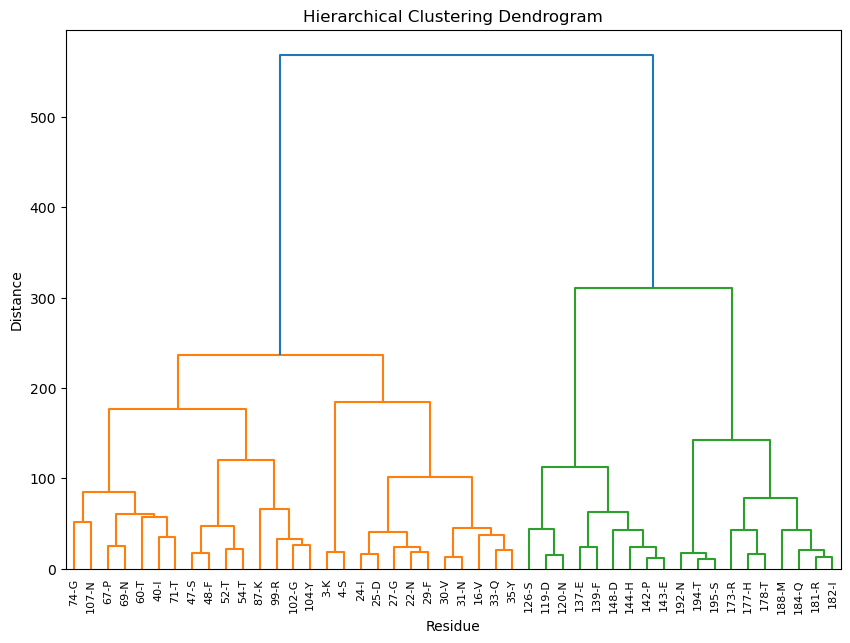

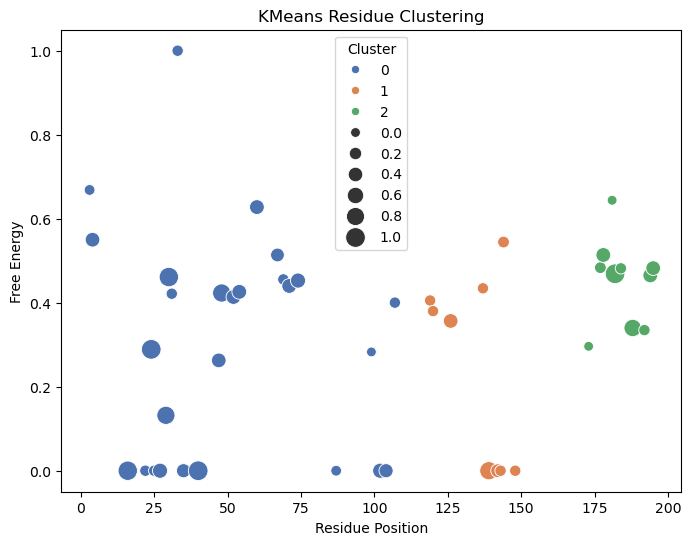

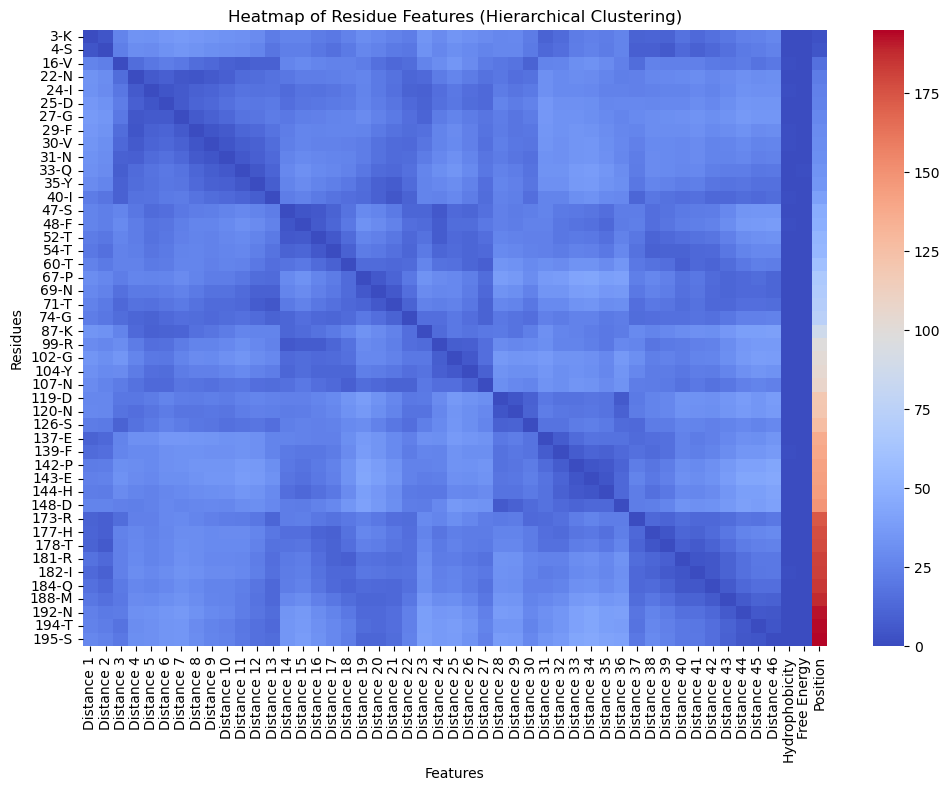

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Free energy values
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: None, 22: 12.68, 24: 17.85, 25: None, 27: None,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: None, 40: None, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: None, 99: 17.74, 102: None, 104: None, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: None, 142: None, 143: None, 144: 22.42,
    148: None, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    hydrophobicity = hydrophobicity_scale.get(mouse_res, 0)
    free_energy = free_energy_dict.get(pos, None)
    free_energy = free_energy if free_energy is not None else np.nan
    features.append((pos, ca_coord, hydrophobicity, free_energy))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])
hydrophobicity = np.array([f[2] for f in features])
free_energy = np.array([f[3] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Normalize features
hydrophobicity = (hydrophobicity - np.min(hydrophobicity)) / (np.max(hydrophobicity) - np.min(hydrophobicity))
free_energy = np.nan_to_num((free_energy - np.nanmin(free_energy)) / (np.nanmax(free_energy) - np.nanmin(free_energy)))

# Combine features into a feature matrix
combined_features = np.column_stack((distance_matrix, hydrophobicity[:, None], free_energy[:, None], positions[:, None]))

# Perform KMeans clustering (optional: change n_clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_features)
kmeans_labels = kmeans.labels_

# Annotate residues with KMeans cluster
kmeans_labeled_residues = list(zip(labels, kmeans_labels))

print("KMeans Residue Clusters:")
for label, cluster in kmeans_labeled_residues:
    print(f"{label}: Cluster {cluster}")

# Perform hierarchical clustering
linked = linkage(combined_features, method='ward')

# Create a dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=labels, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Residue")
plt.ylabel("Distance")
plt.show()

# Visualize KMeans clustering with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=positions,
    y=free_energy,
    hue=kmeans_labels,
    palette="deep",
    size=hydrophobicity,
    sizes=(50, 200)
)
plt.title("KMeans Residue Clustering")
plt.xlabel("Residue Position")
plt.ylabel("Free Energy")
plt.legend(title="Cluster")
plt.show()

# Visualize with heatmap for both methods
# Create a DataFrame for heatmap
feature_df = pd.DataFrame(
    combined_features,
    columns=[f"Distance {i+1}" for i in range(distance_matrix.shape[1])] + ["Hydrophobicity", "Free Energy", "Position"]
)

# Plot the heatmap for hierarchical clustering
plt.figure(figsize=(12, 8))
sns.heatmap(
    feature_df,
    cmap="coolwarm",
    annot=False,
    xticklabels=feature_df.columns,
    yticklabels=labels
)
plt.title("Heatmap of Residue Features (Hierarchical Clustering)")
plt.xlabel("Features")
plt.ylabel("Residues")
plt.show()


1. Input Data and Setup
PDB File: The code processes a protein structure file (PDB format) to extract residue information, specifically for the selected residues (positions, human residues, and mouse residues).
Selected Residues: A list of residue positions and their corresponding human and mouse amino acids is used to focus on specific parts of the protein structure. The residues are mapped to a sequence of features like hydrophobicity and free energy.
Hydrophobicity Scale: A dictionary that gives each amino acid a hydrophobicity score based on the Kyte-Doolittle scale. Hydrophobicity is a key feature that influences protein behavior in water.
2. Feature Extraction
The PDB structure is loaded using the Bio.PDB library, and for each selected residue, we extract:

Residue position (from selected_residues).
CA atom coordinates (3D spatial position of the residue).
Hydrophobicity value (from the hydrophobicity_scale dictionary).
Free energy value (from the free_energy_dict, which is the free energy of mutation for each residue).
These features are collected into a list, which is then processed into arrays for further analysis.

3. Distance Matrix and Feature Normalization
Distance Matrix: The 3D spatial coordinates of the residues are used to compute a distance matrix using pdist (pairwise distance) from scipy. This matrix represents how far apart each residue is from the others in 3D space.

Feature Normalization: The features (hydrophobicity and free energy) are normalized to the range [0, 1] to ensure that all features contribute equally to clustering. This is done using min-max normalization:

For hydrophobicity, it's scaled between 0 and 1.
For free energy, missing values (None) are replaced with NaN, and then the values are scaled between 0 and 1.
Combined Feature Matrix: The distance matrix, along with the normalized hydrophobicity, free energy, and residue positions, are combined into a single feature matrix. This matrix is then used for clustering.

4. Clustering
There are two types of clustering applied:

KMeans Clustering
KMeans is a common machine learning clustering algorithm. It attempts to partition the data into n_clusters (3 in this case) by minimizing the sum of squared distances between data points and their assigned cluster centroids.
The KMeans model is applied to the combined feature matrix (combined_features), and the residues are assigned to clusters (labeled as kmeans_labels).
Cluster Visualization: A scatter plot is created where each residue's position is plotted on the x-axis and its free energy on the y-axis. The points are color-coded based on their KMeans cluster, and the size of the points is based on hydrophobicity.
Hierarchical Clustering
Hierarchical Clustering is another clustering method, but instead of partitioning data into k clusters like KMeans, it creates a hierarchy (tree structure) of clusters. The goal is to group similar residues together in a nested manner.

Linkage Method: The ward linkage method is used, which minimizes the variance within clusters. This method is commonly used for hierarchical clustering because it produces more balanced clusters.

Dendrogram: A dendrogram is a tree-like diagram that shows the hierarchy of clustering. The y-axis represents the distance (dissimilarity) between clusters, and the x-axis represents the individual residues. The leaves of the dendrogram represent individual residues, and the branches represent how clusters merge.

5. Visualization
The code includes two main visualizations to help analyze the clustering results:

KMeans Scatter Plot:
This plot shows the residues’ positions on the x-axis and their free energy on the y-axis. Each residue is color-coded based on its cluster from KMeans, and the size of the point reflects its hydrophobicity score.
Hierarchical Dendrogram:
A dendrogram shows the hierarchical clustering. It shows how residues are grouped together in a tree-like structure, based on their feature similarities (distance, hydrophobicity, and free energy).
Heatmap:
A heatmap visualizes the features of residues after hierarchical clustering. The rows are sorted by cluster label, and each column represents a different feature (distance, hydrophobicity, free energy, etc.). This allows you to see how residues in the same cluster have similar feature values.
6. Key Outputs
KMeans Residue Clusters: After applying KMeans, each residue is assigned a cluster label, which is printed in the console.
Dendrogram: The hierarchical clustering produces a tree-like diagram showing how residues are grouped based on feature similarities.
Cluster Visualization: Both KMeans and hierarchical clustering results are visually represented:
A scatter plot for KMeans clustering.
A dendrogram for hierarchical clustering.
Why Both Methods?
KMeans: This method is efficient and commonly used when the number of clusters is known beforehand. It's good for a quick partitioning of the data into clusters.
Hierarchical Clustering: This method is useful for exploring the structure of the data at different levels. It doesn’t require the number of clusters to be specified beforehand, and it provides a visual tree-like structure that shows how the data naturally groups together.
By using both clustering methods, you can compare how the residues are grouped using different approaches. For example, KMeans gives fixed clusters, while hierarchical clustering gives a more flexible view of how residues are related at different levels of similarity.

Summary:
KMeans clusters residues into 3 groups based on spatial, hydrophobicity, and free energy features.
Hierarchical clustering provides a dendrogram that shows the nested relationships between residues.
The visualizations help to interpret the clustering results, allowing you to explore the patterns in residue behavior based on these features.

1. Normalization of Features
In the code, all the features—hydrophobicity, free energy, and the coordinates—are processed to ensure they are on a similar scale. This is important for clustering algorithms like KMeans and hierarchical clustering, as they rely on the distances between data points (and distances are sensitive to feature scale).

To normalize the free energy:

The code applies min-max normalization to the free energy values:
python
Copy code
free_energy = np.nan_to_num((free_energy - np.nanmin(free_energy)) / (np.nanmax(free_energy) - np.nanmin(free_energy)))
Min-max normalization works by subtracting the minimum value of the feature (in this case, free energy) from each data point and then dividing by the range (the difference between the maximum and minimum values). This results in a transformed feature where all the values lie within the range of 0 to 1:
Formula:
Normalized Value
=
Original Value
−
Min Value
Max Value
−
Min Value
Normalized Value= 
Max Value−Min Value
Original Value−Min Value
​
 
After this transformation, all free energy values are rescaled to a new range of [0, 1].
2. Why Normalize?
Normalization ensures that no feature dominates the clustering process due to its scale. For example:

If free energy had a much larger numerical range compared to hydrophobicity, it could overpower the influence of hydrophobicity in clustering.
By normalizing both free energy and hydrophobicity, the algorithm treats all features equally, avoiding any one feature from having a disproportionately large effect on the clustering results.
3. Visualizing the Normalized Data
After normalization:

The free energy values are now between 0 and 1.
The scatter plot uses the normalized free energy values for the y-axis, so you see a 0-1 scale rather than the original free energy values (which could have been in a completely different range).
Similarly, hydrophobicity is also normalized to lie between 0 and 1, so it is represented correctly on the plot in terms of size.
4. Effect on the Scatter Plot
Because free energy has been normalized:

The y-axis now represents normalized free energy values, ranging from 0 to 1.
The color and size of the points represent clusters and hydrophobicity, respectively.
Conclusion:
The y-axis scaling is due to the min-max normalization of the free energy feature. This makes the values comparable across different features (such as hydrophobicity and distances) and ensures the clustering is based on similarly scaled data. The transformation doesn't affect the underlying relationships between the residues; it just makes sure that the clustering algorithm treats all features equally in terms of their influence on the clusters.
